# Codificação de caracteres

A codificação de texto padrão do código Python é UTF-8

Para converter uma variável string de ascii para bytes podemos usar o código abaixo:

In [3]:
antes = "Este é o símbolo do euro: €"
depois = antes.encode("utf-8", errors = "replace")

print(antes)
print(depois)

Este é o símbolo do euro: €
b'Este \xc3\xa9 o s\xc3\xadmbolo do euro: \xe2\x82\xac'


Para visualizar o texto corretamente é necessário converter de bytes para ascii

In [5]:
print(depois.decode("utf-8"))

Este é o símbolo do euro: €


### Lendo arquivos com problemas de codificação

In [9]:
#!pip install chardet
import chardet
with open("BrasilSocial_charset.csv", 'rb') as rawdata:
    print(chardet.detect(rawdata.read(10000)))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Podemos carregar o arquivo com a codificação encontrada utilizando o código:

In [4]:
import pandas as pd
pd.read_csv("BrasilSocial_charset.csv", encoding='ISO-8859-1')

,Regiao,Anos Estudo,Renda Média,Área,Homicídios,Suicídios,Populaçao,Desemprego
0,Regiao Centro-oeste,8.1,1394.40,1596294.72,5207,1118,14058094,0.105
1,Regiao Norte,7.3,782.76,3846293.15,8470,894,15864454,0.127
2,Regiao Nordeste,6.4,730.24,1551626.90,27572,2973,53073882,0.159
3,Regiao Sul,8.1,1413.81,563450.28,7109,2857,27386891,0.840
4,Regiao Sudeste,8.5,1378.32,924565.47,16294,4626,80364410,0.138


# Limpeza

### Manipulação de Dados Faltantes

Primeiro, vamos simular um dataframe com dados faltantes através dos comandos abaixo:

* O método sample sorteia registrosdo dataframe original e cria dfupdate

* O método update atualiza os registrosdo dataframe original

* O método replace substitui “nan” pornp.nan

In [5]:
import numpy as np 

df = pd.read_csv("california_housing_train.csv")

#population
qt_nan = int(df.shape[0] * 0.4)
dfupdate = df.sample(qt_nan)
dfupdate.population = 'nan'
df.update(dfupdate)

#households
qt_nan = int(df.shape[0] * 0.70)
dfupdate = df.sample(qt_nan)
dfupdate.households = 'nan'
df.update(dfupdate)

df = df.replace("nan", np.nan)

In [9]:
df.shape

(17000, 9)

Para calculamos o porcentual de valores faltantes podemos utilizar o código:

In [13]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print((total_missing/total_cells) * 100)

12.222222222222221


Podemos visualizar algumas informações sobre os dados faltantes utilizando a biblioteca missingno:

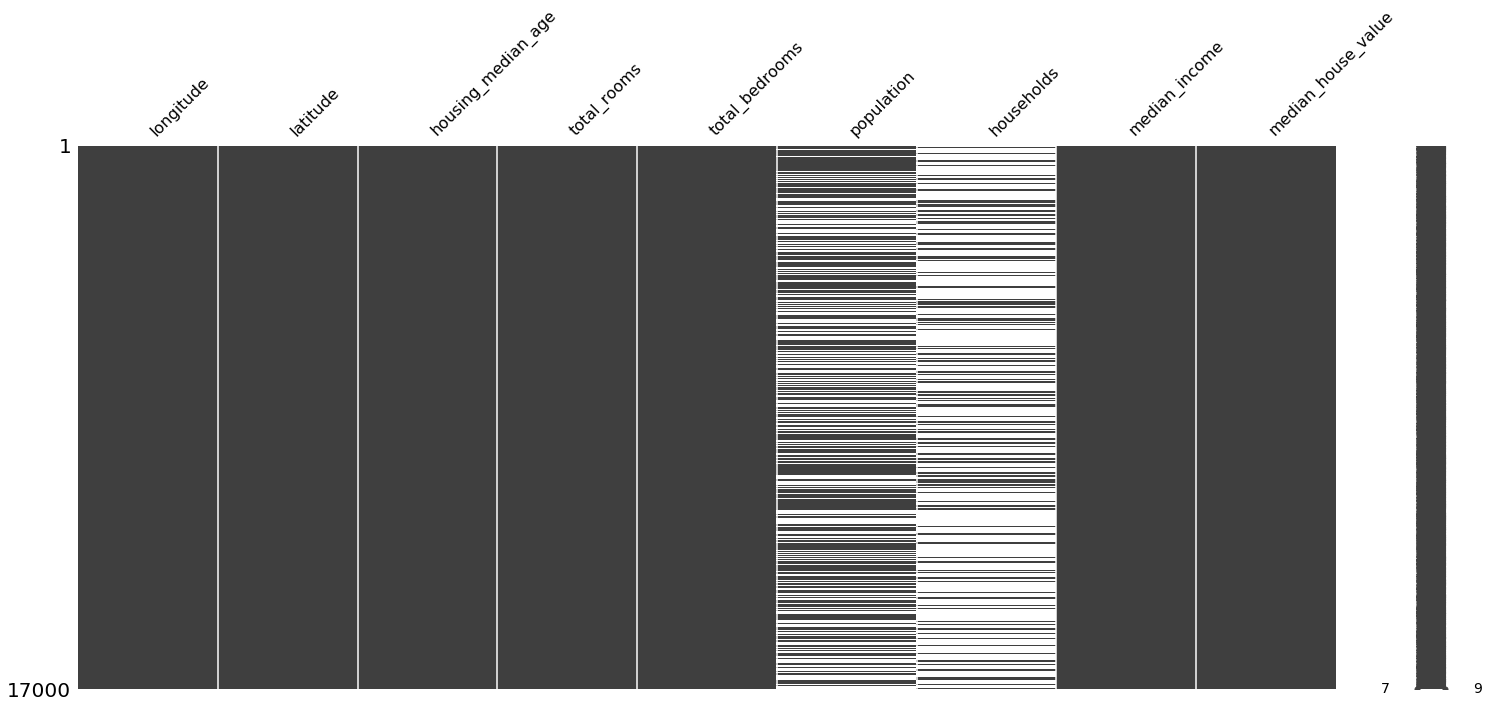

In [16]:
#!pip install missingno
import missingno as msno 
%matplotlib inline

msno.matrix(df)

Exibir a informação como gráfico de barras:

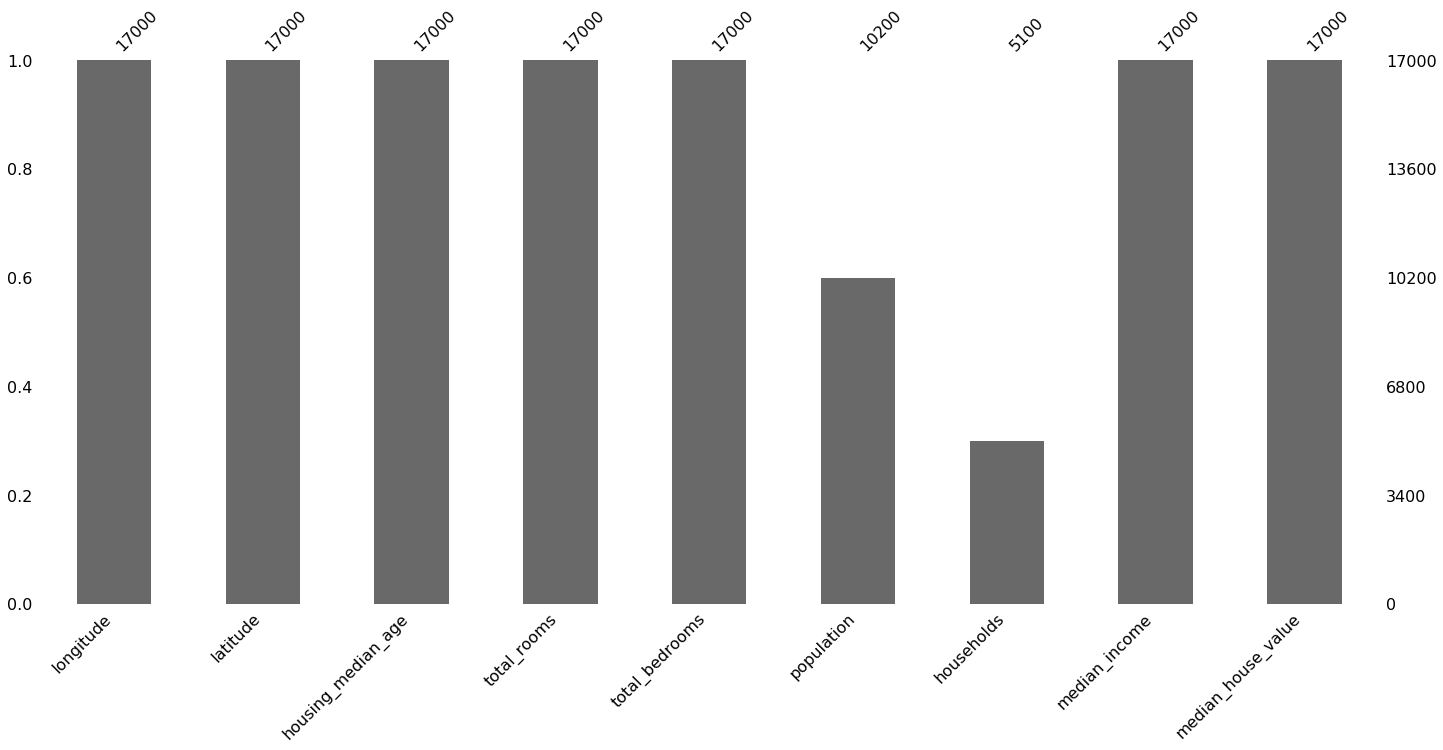

In [17]:
msno.bar(df)

...ou como dendograma:

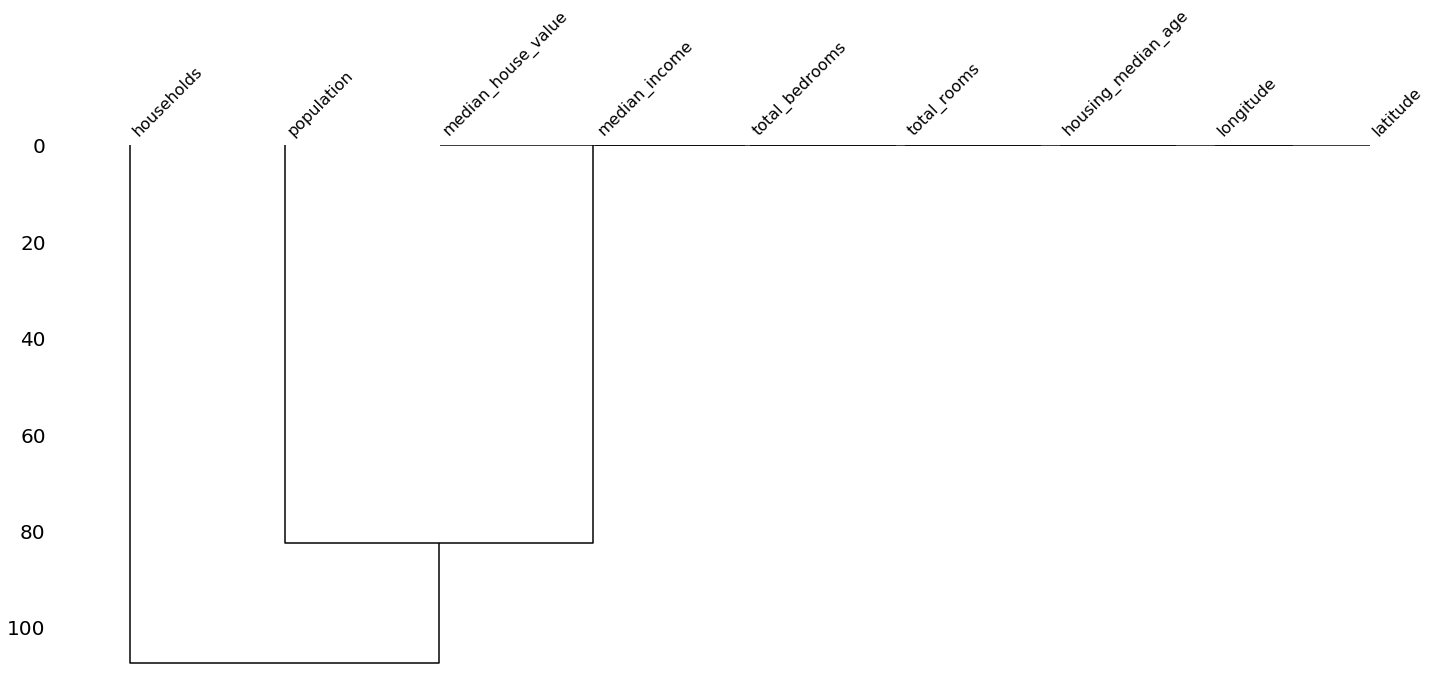

In [18]:
msno.dendrogram(df)

### Descartar valores ausentes

Remove todos os registros que contém pelo menos um valor ausente:

In [23]:
df2 = df.dropna()
print(str(df.shape) + " -> " + str(df2.shape))

(17000, 9) -> (3073, 9)


Podemos remover todas as colunas que contém um valor ausente modificando o eixo através do parâmetro axis=1:

In [20]:
df2 = df.dropna(axis = 1)
print(str(df.shape) + " -> " + str(df2.shape))

(17000, 9) -> (17000, 7)


### Preencher valores ausentes

Substituir todos os valores numéricos nulos (NaN) por zero com o comando:

In [24]:
print(df.isnull().sum())
print()

df2 = df.fillna(0)
print(df2.isnull().sum())

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population             6800
households            11900
median_income             0
median_house_value        0
dtype: int64

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


Para séries de dados que possuam uma ordem lógica e que possam ser interpoladas podemos usar o método “bfill”:

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,NaN,NaN,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,NaN,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,NaN,NaN,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,NaN,NaN,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [29]:
df.fillna(method = 'bfill', axis=0).fillna("0")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1129.0,262,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,262,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,624.0,262,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,624.0,262,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,1194.0,369,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,478,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,806.0,478,1.9797,85800.0


### Imputação de dados p/ valores ausentes

Em dados normalmente distribuídos podemos inferir os valores dentro de 2 desvios padrão da média e preencher os valores ausentes entre $[(\bar{x} - 2 \times S),(\bar{x} + 2 \times S)]$ na coluna _polulation_:

In [16]:
df_fix = df.copy()

df_pop_sem_nan = df_fix[~df_fix.population.isnull()]
df_pop_nan = df_fix[df_fix.population.isnull()]

pop_media = df_pop_sem_nan.population.mean()
pop_desvpad = df_pop_sem_nan.population.std()
pop_cont = df_pop_nan.population.isna().sum()

rand = np.random.randint(pop_media - 2 * pop_desvpad,
				pop_media + 2 * pop_desvpad,
				size = pop_cont) 

df_fix["population"][np.isnan(df_fix["population"])] = rand

df_fix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1109.0,NaN,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,NaN,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,2503.0,NaN,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,305.0,NaN,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,2231.0,NaN,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,3353.0,NaN,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


### Erros de sintaxe

Espaços em Branco (Trim)

In [32]:
exemplo = "  olá mundo "
print("\'" + exemplo + "\' => \'" + exemplo.strip() + "\'")

'  olá mundo ' => 'olá mundo'


Formato de Máscara (Pad strings)

In [20]:
exemplo = '313'
print(exemplo.zfill(6))

print(exemplo.rjust(6, '0'))

000313
AAA313


### Corrigindo Erros de digitação

In [43]:
X = pd.DataFrame(
    np.array(['M', 'O-', 'Média',
             'M', 'O-', 'Alta',
              'Fem.', 'O+', 'Alta',
              'F', 'AB', 'Baixa',
              'F', 'B+', np.NaN])
              .reshape((5,3)),
                columns = ['Sexo', 'Tipo Sangue', 'Educação'])
X

,Sexo,Tipo Sangue,Educação
0,M,O-,Média
1,M,O-,Alta
2,Fem.,O+,Alta
3,F,AB,Baixa
4,F,B+,nan


Mapear valores para "masculino" ou "feminino“

In [37]:
sexo_fix = X['Sexo'].map({'M':'masculino', 'F':'feminino', 'Fem.':'feminino'})
X.update(sexo_fix)

X

,Sexo,Tipo Sangue,Educação
0,masculino,O-,Média
1,masculino,O-,Alta
2,feminino,O+,Alta
3,feminino,AB,Baixa
4,feminino,B+,nan


Correspondência de Padrões

In [42]:
import re

# procurar a ocorrência de m ou M no início da string
# re.sub(r"^m.*$", 'Masculino', 'masculino', flags=re.IGNORECASE)

# Para procurarmos diretamente na coluna “sexo”podemos utilizar o método “apply”:
# X['Sexo'].apply(lambda r: re.sub(r"^m.*$", 'Masculino', r, flags=re.IGNORECASE))

# Podemos corrigir os valores de diversos padrões e substituí-los com o comando “loc”:
X.loc[X['Sexo'].str.contains(r"^m.*$", flags=re.IGNORECASE, regex=True), 'Sexo'] ='Masculino'
X.loc[X['Sexo'].str.contains(r"^f.*$", flags=re.IGNORECASE, regex=True), 'Sexo'] ='Feminino'
X

,Sexo,Tipo Sangue,Educação
0,Masculino,O-,Média
1,Masculino,O-,Alta
2,Feminino,O+,Alta
3,Feminino,AB,Baixa
4,Feminino,B+,nan


Correspondência difusa

In [46]:
#!pip install python-Levenshtein
from Levenshtein import distance

# Distância de Levenshtein entre a coluna Sexo e as strings “masculino” e  “feminino”
X['Sexo'].apply(lambda r: [r, distance(r, "masculino"), distance(r, "feminino")])

0       [M, 9, 8]
1       [M, 9, 8]
2    [Fem., 9, 6]
3       [F, 9, 8]
4       [F, 9, 8]
Name: Sexo, dtype: object

"lisboa" pode ser inserido como "lisboa", "lisbona", "Lisbon" etc. Distância de Levenshtein entre registros e a palavra “Lisboa”

In [47]:
Y = pd.DataFrame(["Lisboa", "lisboa", " Lisboa", "lisbona", "london"], columns=["Cidade"])

from Levenshtein import ratio
Y['Cidade'].apply(lambda r: [r, distance(r, "Lisboa"), round(ratio(r, "Lisboa"),2)])

0      [Lisboa, 0, 1.0]
1     [lisboa, 1, 0.83]
2    [ Lisboa, 1, 0.92]
3    [lisbona, 2, 0.77]
4     [london, 5, 0.17]
Name: Cidade, dtype: object

### Conversão de colunas para datetime

In [29]:
df = pd.DataFrame(
    np.array(['Envio', '05/02/2019',
             'Entrega', '05/12/2019',
              'Análise', '06/02/2019',
              'Aprovação', '07/17/2019',
              'Contratação', '08/20/2019'])
              .reshape((5,2)),
                columns = ['Etapa', 'Data'])
df

,Etapa,Data
0,Envio,02/05/2019
1,Entrega,12/05/2019
2,Análise,02/06/2019
3,Aprovação,17/07/2019
4,Contratação,20/08/2019


Para converter uma coluna no formato datetime, usamos o comando to_datetime:

In [27]:
df['date_parsed'] = pd.to_datetime(df['Data'], format = "%m/%d/%Y")
df

,Etapa,Data,date_parsed
0,Envio,05/02/2019,2019-05-02
1,Entrega,05/12/2019,2019-05-12
2,Análise,06/02/2019,2019-06-02
3,Aprovação,07/17/2019,2019-07-17
4,Contratação,08/20/2019,2019-08-20


Podemos pedir ao pandas que “adivinhe” o formato das datas de uma coluna com o parâmetro infer_datetime_format:

In [30]:
df['date_parsed'] = pd.to_datetime(df['Data'], infer_datetime_format=True)
df

,Etapa,Data,date_parsed
0,Envio,02/05/2019,2019-02-05
1,Entrega,12/05/2019,2019-12-05
2,Análise,02/06/2019,2019-02-06
3,Aprovação,17/07/2019,2019-07-17
4,Contratação,20/08/2019,2019-08-20


### Verificando conversões de data

Um método é calcular o histograma dos dias convertidos. É esperado que os dias sejam distribuídos uniformemente entre 1 e 30 (exceto 31, pois nem todos os meses tem 31 dias).

* Caso a conversão esteja errada, o serão distribuídos uniformemente entre 1 e 12.

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

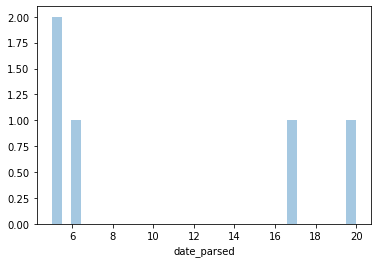

In [31]:
import seaborn as sns
day_of_month = df['date_parsed'].dt.day
day_of_month = day_of_month.dropna()

sns.distplot(day_of_month, kde=False, bins=31)